In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("tinkoff_legal_entities_new.csv")
df.head()

,id,date,phones_num,phb_fraud,phb_dirty,phb_all_bad,phb_all,phb_bad_perc,found_phones,phb_fraud_dir,...,defendant_case_perc,rating_ya,ratings_cnt_ya,reviews_cnt_ya,rating_yell,reviews_cnt_yell,rating_2gis,reviews_cnt_2gis,rating_avito,reviews_cnt_avito
0,a782615660478a,2022-10-30 00:00:00,1,0.0,2.0,2.0,1498.0,0.13,1.0,0.0,...,NaN,NaN,0.0,15.0,4.000000,0.0,0.000000,0.0,NaN,NaN
1,a7706752171a,2022-01-15 00:00:00,16,0.0,0.0,0.0,2421.0,0.00,16.0,0.0,...,NaN,4.15,114.0,39.0,3.700000,1.0,0.142857,2.0,4.8,5.0
2,a745212602258a,2021-06-03 00:00:00,4,0.0,0.0,0.0,1503.0,0.00,3.0,0.0,...,NaN,NaN,0.0,4.0,4.000000,0.0,0.000000,0.0,NaN,NaN
3,a2466264323a,2022-09-25 00:00:00,3,0.0,0.0,0.0,77.0,0.00,2.0,0.0,...,NaN,NaN,0.0,2.0,4.500000,0.0,4.800000,5.0,NaN,NaN
4,a7728551510a,2022-04-28 00:00:00,161,4.0,2.0,6.0,17842.0,0.03,145.0,0.0,...,NaN,4.15,21338.0,5772.0,4.244828,308.0,1.358362,2943.0,NaN,NaN


# Fill Nan

In [5]:
rating_columns = [
    "rating_ya",
    "rating_yell",
    "rating_avito",
    "rating_2gis",
]

reviews_count_columns = [
    "reviews_cnt_ya",
    "reviews_cnt_yell",
    "reviews_cnt_2gis",
    "reviews_cnt_avito",
    "ratings_cnt_ya"
]

phones = [
    "phb_bad_perc_dir",
    "phb_all_dir",  # !
    "phb_all_bad_dir",  # !
    "phb_dirty_dir",
    "phb_fraud_dir",
    "phb_bad_perc",
    "found_phones_dir",
    "phb_all",
    "phb_all_bad",
    "phb_dirty",
    "phb_fraud",
    "found_phones",
    "phones_num"

]

bank_and_police = [
    "total_defendant_case_amt",
    "defendant_case_perc",
    "total_defendant_case_cnt",
    "total_case_cnt",
    "mvd_request_num",
    "complaints_num_dir",
    "complaints_num",
    "claims_percent",
    "appl_num",
    "bad_rep_tcb"
]

data_without_description = [
    "claims_num"
]

In [6]:
df.isna().sum() / df.shape[0] * 100

id                           0.000000
date                         0.000000
phones_num                   0.000000
phb_fraud                    0.073333
phb_dirty                    0.073333
phb_all_bad                  0.073333
phb_all                      0.073333
phb_bad_perc                 0.073333
found_phones                 0.073333
phb_fraud_dir                8.206667
phb_dirty_dir                8.206667
phb_all_bad_dir              8.206667
phb_all_dir                  8.206667
phb_bad_perc_dir             8.206667
found_phones_dir             8.206667
claims_percent              34.013333
claims_num                  34.013333
appl_num                    34.013333
complaints_num              99.880000
complaints_num_dir          99.693333
mvd_request_num             93.320000
bad_rep_tcb                 99.153333
total_case_cnt              99.573333
total_defendant_case_cnt    99.573333
total_defendant_case_amt    99.573333
defendant_case_perc         99.573333
rating_ya   

In [7]:
df[rating_columns] = df[rating_columns].fillna(-1)
df[reviews_count_columns] = df[reviews_count_columns].fillna(0)
df[phones] = df[phones].fillna(0)
df[bank_and_police] = df[bank_and_police].fillna(0)
df[data_without_description] = df[data_without_description].fillna(0)

In [8]:
df.isna().sum()

id                          0
date                        0
phones_num                  0
phb_fraud                   0
phb_dirty                   0
phb_all_bad                 0
phb_all                     0
phb_bad_perc                0
found_phones                0
phb_fraud_dir               0
phb_dirty_dir               0
phb_all_bad_dir             0
phb_all_dir                 0
phb_bad_perc_dir            0
found_phones_dir            0
claims_percent              0
claims_num                  0
appl_num                    0
complaints_num              0
complaints_num_dir          0
mvd_request_num             0
bad_rep_tcb                 0
total_case_cnt              0
total_defendant_case_cnt    0
total_defendant_case_amt    0
defendant_case_perc         0
rating_ya                   0
ratings_cnt_ya              0
reviews_cnt_ya              0
rating_yell                 0
reviews_cnt_yell            0
rating_2gis                 0
reviews_cnt_2gis            0
rating_avi

In [9]:
df.to_csv("clean_data.csv", index=False)

In [10]:
df.id.nunique()

14787

- посмотреть отзывы
- номера
- зависимость отзывов от номеров

In [11]:
with_rating = df[(df.rating_ya != -1) |
                 (df.rating_yell != -1) |
                 (df.rating_avito != -1) |
                 (df.rating_2gis != -1) |
                 (df.ratings_cnt_ya != -1)
                 ]
with_rating.shape

(15000, 35)

In [12]:
with_all_ratings = df[(df.rating_ya != -1) &
                 (df.rating_yell != -1) &
                 (df.rating_avito != -1) &
                 (df.rating_2gis != -1) &
                 (df.ratings_cnt_ya != -1)
                 ]
with_all_ratings.shape

(135, 35)

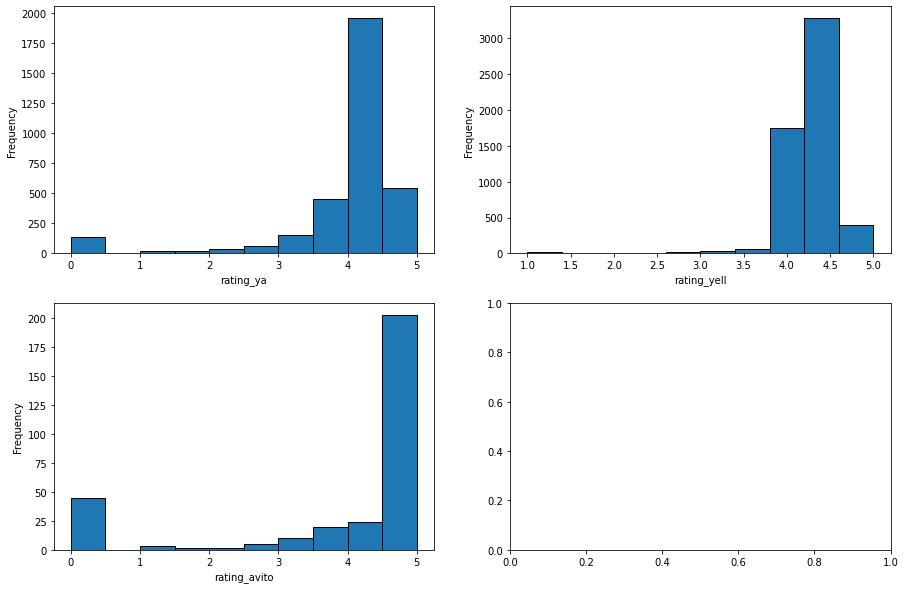

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()
k = 0
for i in rating_columns[:-1]:
    ax[k].set_xlabel(i)
    df.loc[df[i] != -1][i].plot(kind="hist", ax=ax[k], edgecolor='black')
    k += 1

In [14]:
for name in rating_columns:
    man = df[df[name] != -1][name].mean()
    print(f'{name} mean is {man}')

rating_ya mean is 3.9337455830388692
rating_yell mean is 4.2798102031744305
rating_avito mean is 3.920486553432413
rating_2gis mean is 0.7330523769195867


In [15]:
df.phones_num.describe()

count    15000.000000
mean        12.604400
std        151.777264
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       8090.000000
Name: phones_num, dtype: float64

13540


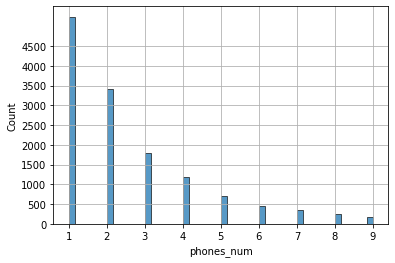

In [46]:
small = df[(df.phones_num < 10)]
print(small.shape[0])
sns.histplot(data=small, x=small.phones_num)
plt.yticks(np.arange(0, 5000, 500))
plt.grid(True)

13730


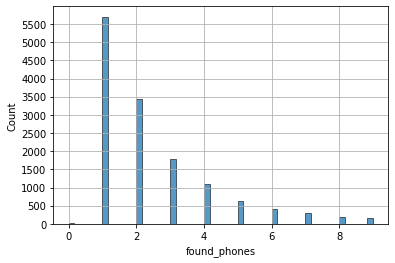

In [47]:
small = df[(df.found_phones < 10)]
print(small.shape[0])
sns.histplot(data=small, x=small.found_phones)
plt.yticks(np.arange(0, 6000, 500))
plt.grid(True)

<AxesSubplot:>

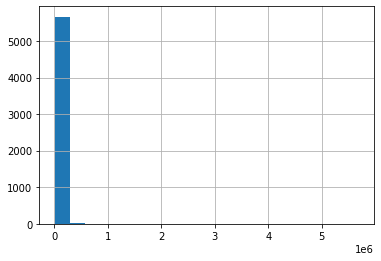

In [48]:
df[df.phb_all > 1_000].phb_all.hist(bins=20)

<AxesSubplot:>

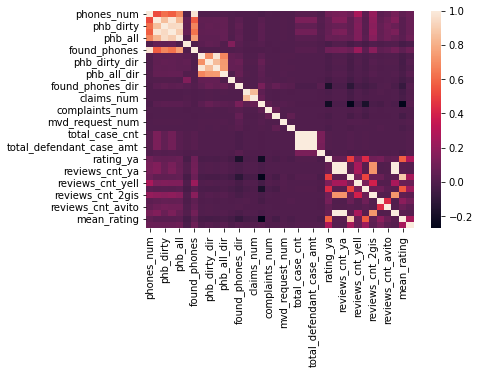

In [49]:
sns.heatmap(df.corr())

<AxesSubplot:>

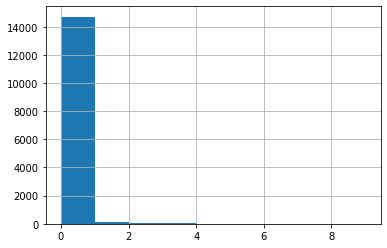

In [50]:
df.phb_bad_perc.hist(bins=np.arange(0, 10, 1))

<AxesSubplot:>

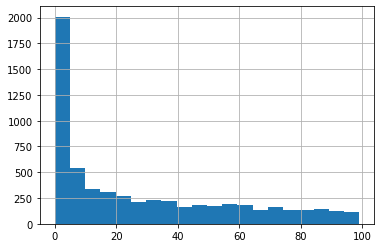

In [21]:
df[df.phb_all_dir < 1_00].phb_all_dir.hist(bins=20)

In [22]:
df.phb_all_dir.describe()

count     15000.000000
mean        551.434867
std        4877.977318
min           0.000000
25%          31.000000
50%         167.000000
75%         414.250000
max      435723.000000
Name: phb_all_dir, dtype: float64

In [23]:
df.phones_num.corr(df.rating_ya)

0.09588140724819848

In [24]:
df.phb_all_dir.corr(df.rating_ya)

-0.011790091573779665

['rating_ya', 'rating_yell', 'rating_avito', 'rating_2gis']


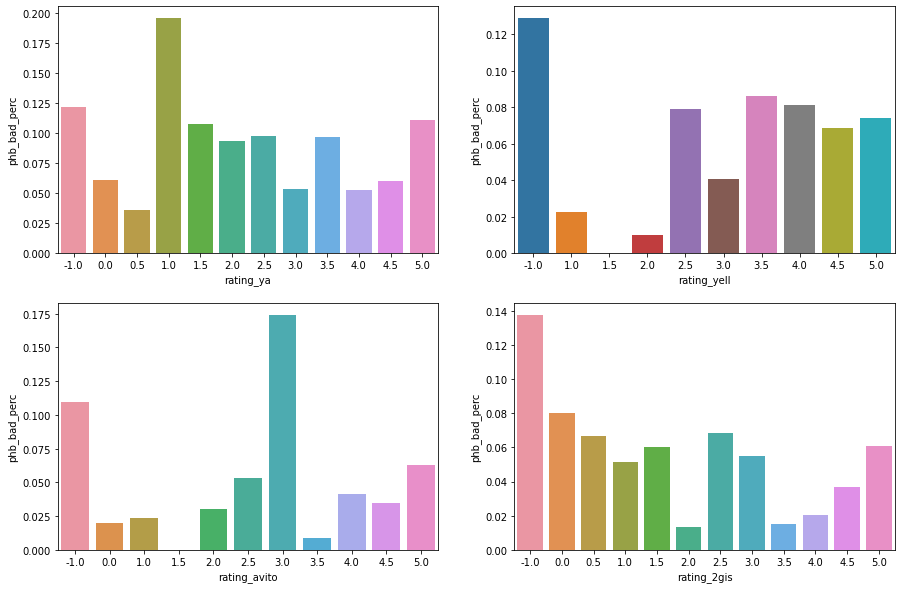

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()
print(rating_columns)
for i, name in enumerate(rating_columns):
    # ax[k].set_title(name)
    data_rating = df.copy()
    data_rating[name] = data_rating[name].apply(lambda x: round(x * 2) / 2)
    sns.barplot(
        ax=ax[i],
        x=data_rating.groupby(name).mean().index,
        y=data_rating.groupby(name).mean().phb_bad_perc
    )

<AxesSubplot:>

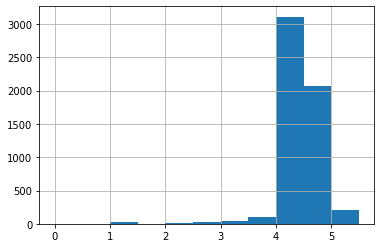

In [26]:
yell = df.rating_yell
yell.apply(lambda x: (2 * x) / 2)
yell.hist(bins=np.arange(0, 6, 0.5))

# разделение по размеру

In [27]:
df['all_reviews_cnt'] = df[reviews_count_columns].sum(axis=1)

In [28]:
def get_mean_rating(row):
    sm = n = 0
    for r in row[rating_columns]:
        if r > 0:
            sm += r
            n += 1
    if n == 0:
        return 0
    return sm / n

df['mean_rating'] = df.apply(lambda x: get_mean_rating(x), axis=1)

In [29]:
df.head()

,id,date,phones_num,phb_fraud,phb_dirty,phb_all_bad,phb_all,phb_bad_perc,found_phones,phb_fraud_dir,...,ratings_cnt_ya,reviews_cnt_ya,rating_yell,reviews_cnt_yell,rating_2gis,reviews_cnt_2gis,rating_avito,reviews_cnt_avito,all_reviews_cnt,mean_rating
0,a782615660478a,2022-10-30 00:00:00,1,0.0,2.0,2.0,1498.0,0.13,1.0,0.0,...,0.0,15.0,4.000000,0.0,0.000000,0.0,-1.0,0.0,15.0,4.000000
1,a7706752171a,2022-01-15 00:00:00,16,0.0,0.0,0.0,2421.0,0.00,16.0,0.0,...,114.0,39.0,3.700000,1.0,0.142857,2.0,4.8,5.0,161.0,3.198214
2,a745212602258a,2021-06-03 00:00:00,4,0.0,0.0,0.0,1503.0,0.00,3.0,0.0,...,0.0,4.0,4.000000,0.0,0.000000,0.0,-1.0,0.0,4.0,4.000000
3,a2466264323a,2022-09-25 00:00:00,3,0.0,0.0,0.0,77.0,0.00,2.0,0.0,...,0.0,2.0,4.500000,0.0,4.800000,5.0,-1.0,0.0,7.0,4.650000
4,a7728551510a,2022-04-28 00:00:00,161,4.0,2.0,6.0,17842.0,0.03,145.0,0.0,...,21338.0,5772.0,4.244828,308.0,1.358362,2943.0,-1.0,0.0,30361.0,3.251063


In [30]:
size_columns = ['phb_all',  'appl_num', 'all_reviews_cnt']
has_reviews = df[df['all_reviews_cnt'] > 0]

q90 = has_reviews[size_columns].quantile(0.9)
q75 = has_reviews[size_columns].quantile(0.75)
q50 = has_reviews[size_columns].quantile(0.50)
q25 = has_reviews[size_columns].quantile(0.25)

q = has_reviews[size_columns].quantile([0.25, 0.5, 0.75, 0.9])
q.at[0.75, 'phb_all']

3320.0

In [31]:
q.loc[0.25]

phb_all            491.0
appl_num             0.0
all_reviews_cnt      8.0
Name: 0.25, dtype: float64

In [32]:
real_huge_companies = df[(df['phb_all'] > q90['phb_all']) & (df['appl_num'] > q90['appl_num']) & (df['all_reviews_cnt'] > q90['all_reviews_cnt'])]
real_huge_companies.head()

,id,date,phones_num,phb_fraud,phb_dirty,phb_all_bad,phb_all,phb_bad_perc,found_phones,phb_fraud_dir,...,ratings_cnt_ya,reviews_cnt_ya,rating_yell,reviews_cnt_yell,rating_2gis,reviews_cnt_2gis,rating_avito,reviews_cnt_avito,all_reviews_cnt,mean_rating
428,a7704340310a,2022-02-18 00:00:00,8090,4326.0,2867.0,7193.0,5693618.0,0.13,7851.0,0.0,...,56712.0,17681.0,4.238974,131.0,0.759524,1804.0,4.011111,214.0,76542.0,3.339902
1992,a7714617793a,2022-08-26 00:00:00,368,90.0,151.0,241.0,233293.0,0.10,321.0,8.0,...,17153.0,4699.0,4.240574,43.0,0.640643,2677.0,-1.000000,0.0,24572.0,2.757072
2274,a7728178835a,2022-09-22 00:00:00,58,24.0,4.0,28.0,35774.0,0.08,55.0,0.0,...,690.0,306.0,4.277778,0.0,0.844444,51.0,-1.000000,0.0,1047.0,3.090741
2389,a7740000076a,2022-10-18 00:00:00,470,161.0,328.0,489.0,401739.0,0.12,426.0,0.0,...,1027.0,349.0,4.312500,9.0,0.500000,1.0,-1.000000,0.0,1386.0,2.694167
2392,a7718947150a,2022-10-16 00:00:00,12,0.0,0.0,0.0,10923.0,0.00,12.0,0.0,...,9383.0,4020.0,4.350000,24.0,3.680000,23.0,-1.000000,0.0,13450.0,4.186667


In [33]:
huge_companies = df[(df['phb_all'] > q90['phb_all']) | (df['appl_num'] > q90['appl_num']) | (df['all_reviews_cnt'] > q90['all_reviews_cnt'])]
huge_companies

,id,date,phones_num,phb_fraud,phb_dirty,phb_all_bad,phb_all,phb_bad_perc,found_phones,phb_fraud_dir,...,ratings_cnt_ya,reviews_cnt_ya,rating_yell,reviews_cnt_yell,rating_2gis,reviews_cnt_2gis,rating_avito,reviews_cnt_avito,all_reviews_cnt,mean_rating
0,a782615660478a,2022-10-30 00:00:00,1,0.0,2.0,2.0,1498.0,0.13,1.0,0.0,...,0.0,15.0,4.000000,0.0,0.000000,0.0,-1.0,0.0,15.0,4.000000
4,a7728551510a,2022-04-28 00:00:00,161,4.0,2.0,6.0,17842.0,0.03,145.0,0.0,...,21338.0,5772.0,4.244828,308.0,1.358362,2943.0,-1.0,0.0,30361.0,3.251063
12,a631306312332a,2022-09-11 00:00:00,4,0.0,0.0,0.0,376.0,0.00,4.0,0.0,...,18.0,5.0,-1.000000,0.0,0.000000,0.0,-1.0,0.0,23.0,3.700000
15,a366322685170a,2022-10-02 00:00:00,4,0.0,0.0,0.0,559.0,0.00,2.0,0.0,...,0.0,0.0,4.500000,0.0,0.000000,0.0,-1.0,0.0,0.0,4.500000
31,a7805486700a,2022-10-08 00:00:00,8,0.0,0.0,0.0,6645.0,0.00,6.0,0.0,...,0.0,0.0,-1.000000,0.0,0.000000,0.0,-1.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14955,a401122666601a,2022-11-05 00:00:00,1,2.0,3.0,5.0,3405.0,0.15,1.0,0.0,...,0.0,0.0,-1.000000,0.0,-1.000000,0.0,-1.0,0.0,0.0,0.000000
14969,a773114875929a,2022-09-18 00:00:00,1,0.0,0.0,0.0,416.0,0.00,1.0,0.0,...,0.0,0.0,-1.000000,0.0,-1.000000,0.0,-1.0,0.0,0.0,0.000000
14971,a027712607104a,2022-10-22 00:00:00,1,0.0,0.0,0.0,479.0,0.00,1.0,0.0,...,0.0,0.0,-1.000000,0.0,-1.000000,0.0,-1.0,0.0,0.0,0.000000
14986,a242903863394a,2022-09-18 00:00:00,1,0.0,0.0,0.0,580.0,0.00,1.0,0.0,...,0.0,0.0,-1.000000,0.0,-1.000000,0.0,-1.0,0.0,0.0,0.000000


In [34]:
susp_reviews = df[(df['phb_all'] < q25['phb_all']) & (df['all_reviews_cnt'] > q90['all_reviews_cnt'])]
susp_reviews[['phb_all', 'all_reviews_cnt', 'bad_rep_tcb']]

,phb_all,all_reviews_cnt,bad_rep_tcb
107,116.0,1265.0,0.0
856,15.0,11867.0,0.0
1073,249.0,759.0,0.0
1131,4.0,735.0,0.0
1238,112.0,2538.0,0.0
1936,380.0,879.0,0.0
1978,22.0,1023.0,0.0
2035,18.0,17619.0,0.0
2161,451.0,799.0,0.0
2313,6.0,1467875.0,0.0


In [35]:
df[df['all_reviews_cnt'] == 0].shape

(10415, 37)

In [36]:
df.total_case_cnt.value_counts()

0.0       14936
1.0          18
2.0          10
3.0           5
4.0           5
13.0          4
6.0           3
8.0           3
5.0           3
12.0          2
7.0           2
51.0          1
3561.0        1
11.0          1
16.0          1
10.0          1
17.0          1
31.0          1
50.0          1
43.0          1
Name: total_case_cnt, dtype: int64

In [37]:
df[df.bad_rep_tcb == 1]

,id,date,phones_num,phb_fraud,phb_dirty,phb_all_bad,phb_all,phb_bad_perc,found_phones,phb_fraud_dir,...,ratings_cnt_ya,reviews_cnt_ya,rating_yell,reviews_cnt_yell,rating_2gis,reviews_cnt_2gis,rating_avito,reviews_cnt_avito,all_reviews_cnt,mean_rating
411,a550510128162a,2021-06-03 00:00:00,2,0.0,0.0,0.0,54.0,0.00,2.0,0.0,...,0.0,0.0,-1.00,0.0,-1.00,0.0,-1.0,0.0,0.0,0.00
653,a861006882625a,2022-09-06 00:00:00,9,8.0,7.0,15.0,6175.0,0.24,7.0,3.0,...,58.0,48.0,4.40,21.0,1.25,3.0,-1.0,0.0,130.0,3.35
756,a532113502270a,2022-10-28 00:00:00,4,7.0,0.0,7.0,1944.0,0.36,4.0,1.0,...,0.0,0.0,5.00,2.0,1.90,8.0,4.8,17.0,27.0,3.90
1085,a390806572351a,2022-10-25 00:00:00,2,0.0,0.0,0.0,418.0,0.00,1.0,0.0,...,0.0,0.0,-1.00,0.0,-1.00,0.0,-1.0,0.0,0.0,0.00
1144,a5921033506a,2021-06-03 00:00:00,2,0.0,0.0,0.0,75.0,0.00,2.0,0.0,...,0.0,0.0,-1.00,0.0,-1.00,0.0,-1.0,0.0,0.0,0.00
1250,a510303305788a,2022-08-23 00:00:00,2,0.0,0.0,0.0,1288.0,0.00,2.0,0.0,...,0.0,0.0,-1.00,0.0,-1.00,0.0,-1.0,0.0,0.0,0.00
1432,a3625015743a,2022-01-05 00:00:00,1,0.0,0.0,0.0,107.0,0.00,1.0,0.0,...,0.0,0.0,-1.00,0.0,-1.00,0.0,-1.0,0.0,0.0,0.00
2266,a771678932214a,2022-08-30 00:00:00,1,0.0,0.0,0.0,5178.0,0.00,1.0,0.0,...,0.0,0.0,-1.00,0.0,-1.00,0.0,-1.0,0.0,0.0,0.00
2532,a500409027693a,2022-08-23 00:00:00,1,0.0,0.0,0.0,72.0,0.00,1.0,0.0,...,0.0,0.0,-1.00,0.0,-1.00,0.0,-1.0,0.0,0.0,0.00
2580,a470323355905a,2022-10-16 00:00:00,4,20.0,0.0,20.0,6922.0,0.29,4.0,11.0,...,0.0,0.0,-1.00,0.0,-1.00,0.0,-1.0,0.0,0.0,0.00


для определения популярности (размера) берем phb_all, phones_num

In [38]:
df.phb_all.describe()

count    1.500000e+04
mean     4.118891e+03
std      6.010961e+04
min      0.000000e+00
25%      2.280000e+02
50%      6.620000e+02
75%      1.549000e+03
max      5.693618e+06
Name: phb_all, dtype: float64

In [39]:
df.phones_num.describe()

count    15000.000000
mean        12.604400
std        151.777264
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       8090.000000
Name: phones_num, dtype: float64

In [40]:
df[df.bad_rep_tcb == 1].phb_all.mean()

1749.125

In [41]:
df[df.bad_rep_tcb == 0].phb_all.mean()

4122.688969017094

In [42]:
q = df.phb_all.quantile([0, 0.25, 0.50, 0.75, 1])
print(q)
def get_size(phb_cnt):
    for i, v in enumerate(q.values):
        if phb_cnt <= v:
            return i

df['popularity'] = df['phb_all'].apply(lambda x: get_size(x))
df.head()

0.00          0.0
0.25        228.0
0.50        662.0
0.75       1549.0
1.00    5693618.0
Name: phb_all, dtype: float64


,id,date,phones_num,phb_fraud,phb_dirty,phb_all_bad,phb_all,phb_bad_perc,found_phones,phb_fraud_dir,...,reviews_cnt_ya,rating_yell,reviews_cnt_yell,rating_2gis,reviews_cnt_2gis,rating_avito,reviews_cnt_avito,all_reviews_cnt,mean_rating,popularity
0,a782615660478a,2022-10-30 00:00:00,1,0.0,2.0,2.0,1498.0,0.13,1.0,0.0,...,15.0,4.000000,0.0,0.000000,0.0,-1.0,0.0,15.0,4.000000,3
1,a7706752171a,2022-01-15 00:00:00,16,0.0,0.0,0.0,2421.0,0.00,16.0,0.0,...,39.0,3.700000,1.0,0.142857,2.0,4.8,5.0,161.0,3.198214,4
2,a745212602258a,2021-06-03 00:00:00,4,0.0,0.0,0.0,1503.0,0.00,3.0,0.0,...,4.0,4.000000,0.0,0.000000,0.0,-1.0,0.0,4.0,4.000000,3
3,a2466264323a,2022-09-25 00:00:00,3,0.0,0.0,0.0,77.0,0.00,2.0,0.0,...,2.0,4.500000,0.0,4.800000,5.0,-1.0,0.0,7.0,4.650000,1
4,a7728551510a,2022-04-28 00:00:00,161,4.0,2.0,6.0,17842.0,0.03,145.0,0.0,...,5772.0,4.244828,308.0,1.358362,2943.0,-1.0,0.0,30361.0,3.251063,4


In [43]:
df.groupby('popularity')[size_columns].mean()

,phb_all,appl_num,all_reviews_cnt
popularity,,,
0,0.000000,2.000000,113.272727
1,92.414484,1.974078,558.843666
2,423.127001,2.501067,15.123799
3,1040.448533,2.570400,42.391200
4,14923.977594,2.132302,1226.923446


In [44]:
small = df[df['popularity'] < 2]
small.describe()

,phones_num,phb_fraud,phb_dirty,phb_all_bad,phb_all,phb_bad_perc,found_phones,phb_fraud_dir,phb_dirty_dir,phb_all_bad_dir,...,reviews_cnt_ya,rating_yell,reviews_cnt_yell,rating_2gis,reviews_cnt_2gis,rating_avito,reviews_cnt_avito,all_reviews_cnt,mean_rating,popularity
count,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,...,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3.753000e+03,3753.000000,3753.000000
mean,5.455902,0.062084,0.047962,0.110045,92.143618,0.134394,1.888090,0.512657,0.217693,0.730349,...,125.834799,0.434038,0.929123,-0.522323,8.775913,-0.961050,0.524380,5.575377e+02,1.254339,0.997069
std,50.711570,0.696958,0.693283,1.004461,69.451026,1.458991,2.900215,9.621206,2.615516,11.798991,...,5452.400052,2.351749,18.370978,1.020923,251.807986,0.465407,13.315209,2.449662e+04,1.915613,0.054066
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000e+00,0.000000,1.000000
50%,2.000000,0.000000,0.000000,0.000000,83.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000e+00,0.000000,1.000000
75%,2.000000,0.000000,0.000000,0.000000,151.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,4.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000e+00,4.000000,1.000000
max,1754.000000,23.000000,29.000000,29.000000,228.000000,50.000000,101.000000,390.000000,94.000000,438.000000,...,326694.000000,5.000000,737.000000,5.000000,14269.000000,5.000000,595.000000,1.467875e+06,5.000000,1.000000


In [45]:
def score(df, column_name):  # [0; 10]
    mn = df[column_name].min()
    mx = df[column_name].max()
    df[column_name + "_score"] = 10 * (1 - (df[df[column_name]] - mn) / (mx - mn))

def score_all(df, columns):  # [0; 10]
    for col in columns:
        score(df, col)

score_all(df, ['mean_rating'])
df.head()

KeyError: "None of [Float64Index([               4.0, 3.1982142857142857,                4.0,\n                            4.65, 3.2510631203169766, 3.8000000000000003,\n                           4.575,                4.0,                4.5,\n                          2.9125,\n              ...\n                             0.0,                0.0,                0.0,\n                             0.0,                0.0,                0.0,\n                             0.0,                0.0,                0.0,\n                             0.0],\n             dtype='float64', length=15000)] are in the [columns]"

In [ ]:
df.phb_bad_perc_dir.value_counts().reset_index()

In [ ]:
df.mvd_request_num.value_counts()